## MSTICPYConfig

In [2]:
%%writefile msticpyconfig.yaml
AzureSentinel:
  Workspaces:
    ASIHuntOMSWorkspaceV4:
      TenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47
      WorkspaceId: 52b1ab41-869e-4138-9e40-2a4457f09bf0
    CyberSecuritySoc:
      TenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47
      WorkspaceId: 8ecf8077-cf51-4820-aadd-14040956f35d
    Default:
      TenantId: 72f988bf-86f1-41af-91ab-2d7cd011db47
      WorkspaceId: 8ecf8077-cf51-4820-aadd-14040956f35d

SyntaxError: invalid syntax (<ipython-input-2-ea92f455e99a>, line 2)

## Initiializing MSTICPy

In [29]:
# Core MSTICPy initialization for Notebooks
from msticpy.nbtools import nbinit
nbinit.init_notebook(namespace=globals());

# Load query providers (typically you'll be using just one)
qry_prov = QueryProvider("AzureSentinel")

In [32]:
qry_prov.browse_queries()

## Connect to workspace 
```
WorkspaceConfig(workspace=WS_NAME)
```

By default, uses the Default entry

In [34]:
qry_prov.connect(WorkspaceConfig())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploring the schema

In [35]:
qry_prov.schema

{
    "AACAudit": {
        "CallerIPAddress": "string",
        "CallerIdentity": "dynamic",
        "Category": "string",
        "CorrelationId": "string",
        "EventCategory": "string",
        "OperationName": "string",
        "RequestId": "string",
        "ResultType": "string",
        "SourceSystem": "string",
        "Status": "string",
        "TargetResource": "dynamic",
        "TenantId": "string",
        "TimeGenerated": "datetime",
        "Type": "string",
        "_ResourceId": "string",
        "_SubscriptionId": "string"
    },
    "AACHttpRequest": {
        "Category": "string",
        "ClientIPAddress": "string",
        "ClientRequestId": "string",
        "CorrelationId": "string",
        "DurationMs": "int",
        "Method": "string",
        "RequestId": "string",
        "RequestLength": "int",
        "RequestURI": "string",
        "ResponseLength": "int",
        "SourceSystem": "string",
        "StatusCode": "int",
        "TenantId": "string",

### Table schema

In [36]:
type(qry_prov.schema["SigninLogs"])

Kqlmagic.display.JSONDict

In [37]:
qry_prov.schema["SigninLogs"]

{
    "AADTenantId": "string",
    "AlternateSignInName": "string",
    "AppDisplayName": "string",
    "AppId": "string",
    "AuthenticationDetails": "string",
    "AuthenticationMethodsUsed": "string",
    "AuthenticationProcessingDetails": "string",
    "AuthenticationRequirement": "string",
    "AuthenticationRequirementPolicies": "string",
    "Category": "string",
    "ClientAppUsed": "string",
    "ConditionalAccessPolicies": "dynamic",
    "ConditionalAccessStatus": "string",
    "CorrelationId": "string",
    "CreatedDateTime": "datetime",
    "DeviceDetail": "dynamic",
    "DurationMs": "long",
    "FlaggedForReview": "bool",
    "HomeTenantId": "string",
    "IPAddress": "string",
    "IPAddressFromResourceProvider": "string",
    "Id": "string",
    "Identity": "string",
    "IsInteractive": "bool",
    "IsRisky": "bool",
    "Level": "string",
    "Location": "string",
    "LocationDetails": "dynamic",
    "MfaDetail": "dynamic",
    "NetworkLocationDetails": "string",
  

In [14]:
from collections import defaultdict
col_counts = defaultdict(int)

for table, cols in qry_prov.schema.items():
    for col in cols:
        col_counts[col] += 1
        
list(col_counts.items())[:10]

[('TenantId', 207),
 ('TimeGenerated', 316),
 ('Category', 115),
 ('CorrelationId', 109),
 ('Status', 36),
 ('OperationName', 163),
 ('EventCategory', 2),
 ('TargetResource', 1),
 ('ResultType', 43),
 ('CallerIdentity', 2)]

In [42]:
col_count_ser["Category"]

115

<AxesSubplot:>

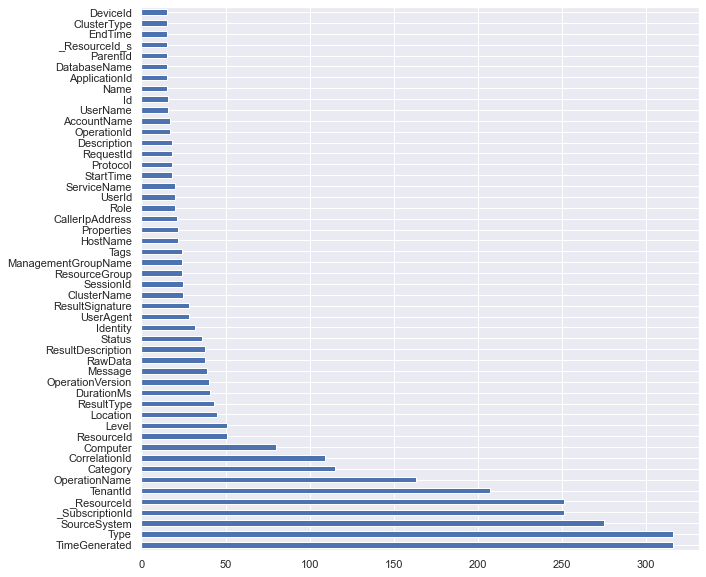

In [20]:
# Convert to pandas series
col_count_ser = pd.Series(col_counts)
col_count_ser.sort_values(ascending=False)[:50].plot.barh(figsize=(10,10))

In [43]:
col_count_df = pd.DataFrame(col_count_ser, columns=["count"])
col_count_df

,count
TenantId,207
TimeGenerated,316
Category,115
CorrelationId,109
Status,36
...,...
ConfigurationTarget_s_s,1
PropertyOperationStatus_s_s,1
AdditionalProgramInfo_s_s,1
SourceFileSize_s_d,1


In [44]:
print("num tables", len(qry_prov.schema))
col_count_df["percentage"] = col_count_df["count"] / len(qry_prov.schema)
col_count_df

num tables 316


,count,percentage
TenantId,207,0.655063
TimeGenerated,316,1.000000
Category,115,0.363924
CorrelationId,109,0.344937
Status,36,0.113924
...,...,...
ConfigurationTarget_s_s,1,0.003165
PropertyOperationStatus_s_s,1,0.003165
AdditionalProgramInfo_s_s,1,0.003165
SourceFileSize_s_d,1,0.003165


<AxesSubplot:>

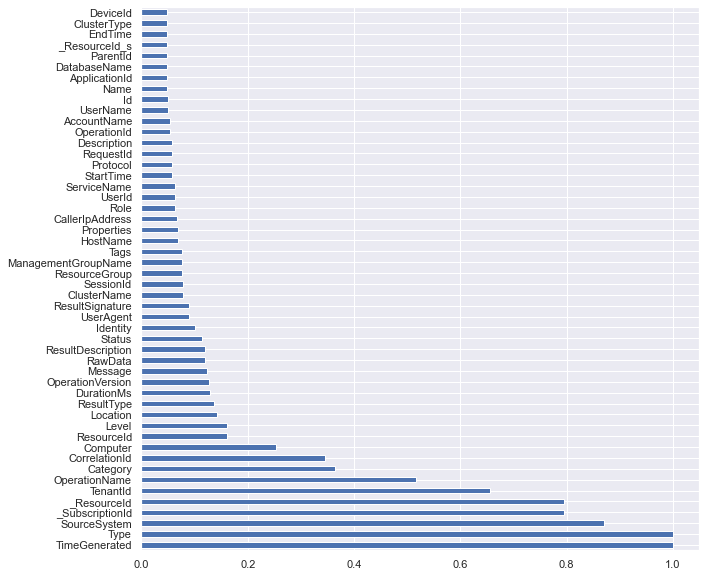

In [47]:
# col_count_df.sort_values(by="percentage", ascending=False)[:50].plot.barh(x="percentage", figsize=(10,10))

# Formatting tip
(
    col_count_df["percentage"]
    .sort_values(ascending=False)[:50]
    .plot
    .barh(figsize=(10,10))
)

In [50]:
def match_cols(col_expr):
    return col_count_ser[col_count_ser.index.str.contains(col_expr, case=False)]

match_cols("UserId")

UserId                     20
UserIdA                     1
UserIdB                     1
UserIdentityType            1
UserIdentityPrincipalid     1
UserIdentityArn             1
UserIdentityAccountId       1
UserIdentityInvokedBy       1
UserIdentityAccessKeyId     1
UserIdentityUserName        1
ActorUserId                 1
DestinationUserID           1
SourceUserID                1
SystemUserId                1
UserId_s_s                  1
UserId_s                    1
TargetUserId                1
PeerUserId                  1
dtype: int64

In [53]:
def in_tables(col):
    return [table for table, cols in qry_prov.schema.items() if col in cols]

in_tables("UserId")

['AADNonInteractiveUserSignInLogs',
 'ACSChatIncomingOperations',
 'ADFSSignInLogs',
 'ApiManagementGatewayLogs',
 'AppAvailabilityResults',
 'AppBrowserTimings',
 'AppDependencies',
 'AppEvents',
 'AppExceptions',
 'AppMetrics',
 'AppPageViews',
 'AppPerformanceCounters',
 'AppRequests',
 'AppTraces',
 'Dynamics365Activity',
 'IntuneDeviceComplianceOrg',
 'OfficeActivity',
 'SignalRServiceDiagnosticLogs',
 'SigninLogs',
 'UserPeerAnalytics']

In [54]:
signin_df = qry_prov.exec_query("SigninLogs | sample 100")
office_df = qry_prov.exec_query("OfficeActivity | sample 100")
winsec_df = qry_prov.exec_query("SecurityEvent | sample 100")
comsec_df = qry_prov.exec_query("CommonSecurityLog | sample 100")
signin_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,TenantId,SourceSystem,TimeGenerated,ResourceId,OperationName,OperationVersion,Category,ResultType,ResultSignature,ResultDescription,DurationMs,CorrelationId,Resource,ResourceGroup,ResourceProvider,Identity,Level,Location,AlternateSignInName,AppDisplayName,AppId,AuthenticationDetails,AuthenticationMethodsUsed,AuthenticationProcessingDetails,AuthenticationRequirement,...,RiskEventTypes,RiskEventTypes_V2,RiskLevelAggregated,RiskLevelDuringSignIn,RiskState,ResourceDisplayName,ResourceIdentity,ServicePrincipalId,ServicePrincipalName,Status,TokenIssuerName,TokenIssuerType,UserAgent,UserDisplayName,UserId,UserPrincipalName,AADTenantId,UserType,FlaggedForReview,IPAddressFromResourceProvider,SignInIdentifier,SignInIdentifierType,ResourceTenantId,HomeTenantId,Type
0,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-04-11 13:49:26.558000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,f3d4f9ee-34a2-4843-8010-e23ff9e07cf3,Microsoft.aadiam,Microsoft.aadiam,,On-Premises Directory Synchronization Service Account,4,US,Sync_SOC-DC-Play_43e5a8e2b2fd@seccxpninja.onmicrosoft.com,Microsoft Azure Active Directory Connect,cb1056e2-e479-49de-ae31-7812af012ed8,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-04-11T13:49:26.5582714+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Windows Azure Active Directory,00000002-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,,On-Premises Directory Synchronization Service Account,d121a060-c2bb-49bd-b551-acad6506e5b6,sync_soc-dc-play_43e5a8e2b2fd@seccxpninja.onmicrosoft.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,Sync_SOC-DC-Play_43e5a8e2b2fd@seccxpninja.onmicrosoft.com,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs
1,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-17 14:08:42.250000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,535d4ef9-ad2a-4ad3-b0d5-c6a22f2ce980,Microsoft.aadiam,Microsoft.aadiam,,Arseny Vasilev,4,RU,,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-06-17T14:08:42.2502273+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.443...",Arseny Vasilev,9267d02c-5f76-40a9-a9eb-b686f3ca47aa,avasilev@viacode.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Guest,None,,,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,5fccd68a-e65e-46ae-96b1-2d896d680249,SigninLogs
2,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-05-20 12:20:08.919000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,947d0475-a665-4758-ae7a-cc82d1d4c574,Microsoft.aadiam,Microsoft.aadiam,,Harisha,4,IN,,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-05-20T12:20:08.9194969+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,[],[],none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,,,{'errorCode': 0},,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.443...",Harisha,3ce68c80-7cc7-4776-9a87-7d862b6dfdb0,harisha@happiestminds.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Guest,None,,,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,77428205-87ff-4048-a645-91b337240228,SigninLogs
3,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-06-17 19:14:29.734000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadia

In [14]:
ioc_extract = IoCExtract()
help(ioc_extract)

Help on IoCExtract in module msticpy.sectools.iocextract object:

class IoCExtract(builtins.object)
 |  IoC Extractor - looks for common IoC patterns in input strings.
 |  
 |  The extract() method takes either a string or a pandas DataFrame
 |  as input. When using the string option as an input extract will
 |  return a dictionary of results. When using a DataFrame the results
 |  will be returned as a new DataFrame with the following columns:
 |  IoCType: the mnemonic used to distinguish different IoC Types
 |  Observable: the actual value of the observable
 |  SourceIndex: the index of the row in the input DataFrame from
 |  which the source for the IoC observable was extracted.
 |  
 |  The class has a number of built-in IoC regex definitions.
 |  These can be retrieved using the ioc_types attribute.
 |  
 |  Addition IoC definitions can be added using the add_ioc_type
 |  method.
 |  
 |  Note: due to some ambiguity in the regular expression patterns
 |  for different types and ob

In [59]:
{attr: "foo" for attr in dir(IoCExtract)}

{'DNS_REGEX': 'foo',
 'IPV4_REGEX': 'foo',
 'IPV6_REGEX': 'foo',
 'LXPATH_REGEX': 'foo',
 'MD5_REGEX': 'foo',
 'SHA1_REGEX': 'foo',
 'SHA256_REGEX': 'foo',
 'URL_REGEX': 'foo',
 'WINPATH_REGEX': 'foo',
 '__annotations__': 'foo',
 '__class__': 'foo',
 '__delattr__': 'foo',
 '__dict__': 'foo',
 '__dir__': 'foo',
 '__doc__': 'foo',
 '__eq__': 'foo',
 '__format__': 'foo',
 '__ge__': 'foo',
 '__getattribute__': 'foo',
 '__gt__': 'foo',
 '__hash__': 'foo',
 '__init__': 'foo',
 '__init_subclass__': 'foo',
 '__le__': 'foo',
 '__lt__': 'foo',
 '__module__': 'foo',
 '__ne__': 'foo',
 '__new__': 'foo',
 '__reduce__': 'foo',
 '__reduce_ex__': 'foo',
 '__repr__': 'foo',
 '__setattr__': 'foo',
 '__sizeof__': 'foo',
 '__str__': 'foo',
 '__subclasshook__': 'foo',
 '__weakref__': 'foo',
 '_add_highest_pri_match': 'foo',
 '_check_decode_url': 'foo',
 '_content_regex': 'foo',
 '_get_ioc_types_to_use': 'foo',
 '_scan_for_iocs': 'foo',
 '_search_in_row': 'foo',
 '_validate_tld': 'foo',
 'add_ioc_type': 'fo

In [60]:
# Regexes
regexes = {attr: getattr(IoCExtract, attr) for attr in dir(IoCExtract) if attr.endswith("_REGEX")}

regexes

{'DNS_REGEX': '((?=[a-z0-9-]{1,63}\\.)[a-z0-9]+(-[a-z0-9]+)*\\.){1,126}[a-z]{2,63}',
 'IPV4_REGEX': '(?P<ipaddress>(?:[0-9]{1,3}\\.){3}[0-9]{1,3})',
 'IPV6_REGEX': '(?<![:.\\w])(?:[A-F0-9]{0,4}:){2,7}[A-F0-9]{0,4}(?![:.\\w])',
 'LXPATH_REGEX': '(?P<root>/+||[.]+)\n            (?P<folder>/(?:[^\\\\/:*?<>|\\r\\n]+/)*)\n            (?P<file>[^/\\0<>|\\r\\n ]+)',
 'MD5_REGEX': '(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{32})(?:$|[^A-Fa-f0-9])',
 'SHA1_REGEX': '(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{40})(?:$|[^A-Fa-f0-9])',
 'SHA256_REGEX': '(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{64})(?:$|[^A-Fa-f0-9])',
 'URL_REGEX': '\n            (?P<protocol>(https?|ftp|telnet|ldap|file)://)\n            (?P<userinfo>([a-z0-9-._~!$&\\\'()*+,;=:]|%[0-9A-F]{2})*@)?\n            (?P<host>([a-z0-9-._~!$&\\\'()*+,;=]|%[0-9A-F]{2})*)\n            (:(?P<port>\\d*))?\n            (/(?P<path>([^?\\#"<>\\s]|%[0-9A-F]{2})*/?))?\n            (\\?(?P<query>([a-z0-9-._~!$&\'()*+,;=:/?@]|%[0-9A-F]{2})*))?\n            (\\

In [61]:
regexes_full = {key: f"^{val}$" for key, val in regexes.items()}
regexes_full

{'DNS_REGEX': '^((?=[a-z0-9-]{1,63}\\.)[a-z0-9]+(-[a-z0-9]+)*\\.){1,126}[a-z]{2,63}$',
 'IPV4_REGEX': '^(?P<ipaddress>(?:[0-9]{1,3}\\.){3}[0-9]{1,3})$',
 'IPV6_REGEX': '^(?<![:.\\w])(?:[A-F0-9]{0,4}:){2,7}[A-F0-9]{0,4}(?![:.\\w])$',
 'LXPATH_REGEX': '^(?P<root>/+||[.]+)\n            (?P<folder>/(?:[^\\\\/:*?<>|\\r\\n]+/)*)\n            (?P<file>[^/\\0<>|\\r\\n ]+)$',
 'MD5_REGEX': '^(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{32})(?:$|[^A-Fa-f0-9])$',
 'SHA1_REGEX': '^(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{40})(?:$|[^A-Fa-f0-9])$',
 'SHA256_REGEX': '^(?:^|[^A-Fa-f0-9])(?P<hash>[A-Fa-f0-9]{64})(?:$|[^A-Fa-f0-9])$',
 'URL_REGEX': '^\n            (?P<protocol>(https?|ftp|telnet|ldap|file)://)\n            (?P<userinfo>([a-z0-9-._~!$&\\\'()*+,;=:]|%[0-9A-F]{2})*@)?\n            (?P<host>([a-z0-9-._~!$&\\\'()*+,;=]|%[0-9A-F]{2})*)\n            (:(?P<port>\\d*))?\n            (/(?P<path>([^?\\#"<>\\s]|%[0-9A-F]{2})*/?))?\n            (\\?(?P<query>([a-z0-9-._~!$&\'()*+,;=:/?@]|%[0-9A-F]{2})*))?\n

In [62]:
import re

email_rgx = r"[\w\d._%+-]+@(?:[\w\d-]+\.)+[\w]{2,}"

re.match(email_rgx, "ianhelle@microsoft.com")
regexes["EMAIL_REGEX"] = email_rgx

In [52]:
ntacct_rgx = r"^[^\/:*?\"<>|]{2,15}\\[^\/:*?\"<>|]{2,15}$"
re.match(ntacct_rgx, "NT AUTHORITY\SYSTEM")
                                     
                                
                                     

<re.Match object; span=(0, 19), match='NT AUTHORITY\\SYSTEM'>

In [ ]:
signin_df["UserPrincipalName"]

In [65]:
signin_df.columns

Index(['TenantId', 'SourceSystem', 'TimeGenerated', 'ResourceId',
       'OperationName', 'OperationVersion', 'Category', 'ResultType',
       'ResultSignature', 'ResultDescription', 'DurationMs', 'CorrelationId',
       'Resource', 'ResourceGroup', 'ResourceProvider', 'Identity', 'Level',
       'Location', 'AlternateSignInName', 'AppDisplayName', 'AppId',
       'AuthenticationDetails', 'AuthenticationMethodsUsed',
       'AuthenticationProcessingDetails', 'AuthenticationRequirement',
       'AuthenticationRequirementPolicies', 'ClientAppUsed',
       'ConditionalAccessPolicies', 'ConditionalAccessStatus',
       'CreatedDateTime', 'DeviceDetail', 'IsInteractive', 'Id', 'IPAddress',
       'IsRisky', 'LocationDetails', 'MfaDetail', 'NetworkLocationDetails',
       'OriginalRequestId', 'ProcessingTimeInMilliseconds', 'RiskDetail',
       'RiskEventTypes', 'RiskEventTypes_V2', 'RiskLevelAggregated',
       'RiskLevelDuringSignIn', 'RiskState', 'ResourceDisplayName',
       'ResourceIde

In [68]:
signin_df["TenantId"].dtype == np.dtype('O')

True

In [70]:
for col in signin_df.columns:
    print(col)

TenantId
SourceSystem
TimeGenerated
ResourceId
OperationName
OperationVersion
Category
ResultType
ResultSignature
ResultDescription
DurationMs
CorrelationId
Resource
ResourceGroup
ResourceProvider
Identity
Level
Location
AlternateSignInName
AppDisplayName
AppId
AuthenticationDetails
AuthenticationMethodsUsed
AuthenticationProcessingDetails
AuthenticationRequirement
AuthenticationRequirementPolicies
ClientAppUsed
ConditionalAccessPolicies
ConditionalAccessStatus
CreatedDateTime
DeviceDetail
IsInteractive
Id
IPAddress
IsRisky
LocationDetails
MfaDetail
NetworkLocationDetails
OriginalRequestId
ProcessingTimeInMilliseconds
RiskDetail
RiskEventTypes
RiskEventTypes_V2
RiskLevelAggregated
RiskLevelDuringSignIn
RiskState
ResourceDisplayName
ResourceIdentity
ServicePrincipalId
ServicePrincipalName
Status
TokenIssuerName
TokenIssuerType
UserAgent
UserDisplayName
UserId
UserPrincipalName
AADTenantId
UserType
FlaggedForReview
IPAddressFromResourceProvider
SignInIdentifier
SignInIdentifierType
Resou

In [71]:
# for col 
signin_df["UserPrincipalName"].str.match(email_rgx).value_counts()

True    100
Name: UserPrincipalName, dtype: int64